In [10]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
pitching_df = pd.read_csv("testdata/core/Pitching.csv")
salary_df = pd.read_csv("testdata/core/Salaries.csv")

# データセット準備

In [12]:
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'playerID'])
df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'lgID', 'playerID'], how='outer')
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'playerID'], how='outer')
#df = pd.merge(pitching_df,salary_df,on=['yearID', 'teamID', 'lgID', 'playerID'])

In [13]:
pitching_df[['yearID','teamID','lgID','playerID']].isnull().sum()

yearID        0
teamID        0
lgID        131
playerID      0
dtype: int64

In [14]:
salary_df[['yearID','teamID','lgID','playerID']].isnull().sum()

yearID      0
teamID      0
lgID        0
playerID    0
dtype: int64

In [15]:
df.count()

playerID    59597
yearID      59597
stint       44963
teamID      59597
lgID        59466
W           44963
L           44963
G           44963
GS          44963
CG          44963
SHO         44963
SV          44963
IPouts      44963
H           44963
ER          44963
HR          44963
BB          44963
SO          44963
BAOpp       43437
ERA         44874
IBB         30388
WP          44830
HBP         44405
BK          44963
BFP         44724
GF          44830
R           44963
SH          12063
SF          12063
GIDP        12061
salary      26431
dtype: int64

In [16]:
df['salary'].isnull().sum()

33166

In [8]:
#how='inner'
#salary      11797
#how='outer'
#salary      26431   =====>母数が多い方が良い。が、正確に情報を判断するには、一時的にもすべてのデータが合ったほうが良い。
#how='inner' minus lgID
#salary      11799

In [17]:
df_sal_nonan = df.dropna(subset=["salary"]).reset_index(drop=True)

In [18]:
df_sal_nonan.isnull().sum()
#df_sal_nonan

playerID        0
yearID          0
stint       14634
teamID          0
lgID            0
W           14634
L           14634
G           14634
GS          14634
CG          14634
SHO         14634
SV          14634
IPouts      14634
H           14634
ER          14634
HR          14634
BB          14634
SO          14634
BAOpp       15095
ERA         14639
IBB         14634
WP          14634
HBP         14634
BK          14634
BFP         14634
GF          14634
R           14634
SH          19950
SF          19950
GIDP        19950
salary          0
dtype: int64

In [24]:
df_sal_nonan.columns.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'salary'],
      dtype='object')>

# データのチェック

In [21]:
df_sal_nonan.corr()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,1.000000,-0.047515,-0.074414,-0.087623,0.067415,-0.058224,-0.254328,-0.160645,-0.002601,-0.097097,...,-0.043798,0.082591,-0.242709,-0.100500,-0.017010,-0.102177,-0.127264,-0.110925,-0.073756,0.351747
stint,-0.047515,1.000000,-0.055457,-0.061738,-0.070531,-0.045840,-0.026973,-0.022531,-0.022666,-0.065268,...,-0.038780,-0.050150,-0.022991,-0.066453,-0.027901,-0.066112,-0.018413,-0.020833,-0.021960,-0.028855
W,-0.074414,-0.055457,1.000000,0.669808,0.140675,0.831890,0.603694,0.542597,-0.103089,0.909445,...,0.489392,0.556752,0.275507,0.898861,-0.208946,0.782736,0.615772,0.583112,0.764165,0.270996
L,-0.087623,-0.061738,0.669808,1.000000,0.093443,0.820497,0.473020,0.367840,-0.072743,0.836743,...,0.501667,0.567027,0.277383,0.852381,-0.189731,0.886829,0.635676,0.642840,0.726307,0.220500
G,0.067415,-0.070531,0.140675,0.093443,1.000000,-0.187776,-0.055740,-0.048015,0.456283,0.148169,...,0.167402,0.100169,0.024497,0.138404,0.677472,0.036459,0.090505,0.052924,0.065754,-0.013964
GS,-0.058224,-0.045840,0.831890,0.820497,-0.187776,1.000000,0.586705,0.504900,-0.267088,0.925400,...,0.497831,0.602502,0.293459,0.931609,-0.477302,0.917344,0.653251,0.657399,0.795830,0.285878
CG,-0.254328,-0.026973,0.603694,0.473020,-0.055740,0.586705,1.000000,0.761341,-0.131482,0.634564,...,0.317074,0.289327,0.279833,0.620395,-0.243470,0.524579,0.386662,0.352784,0.516371,0.088995
SHO,-0.160645,-0.022531,0.542597,0.367840,-0.048015,0.504900,0.761341,1.000000,-0.113515,0.539554,...,0.251107,0.265302,0.215263,0.522947,-0.210474,0.414339,0.327717,0.267301,0.413595,0.109498
SV,-0.002601,-0.022666,-0.103089,-0.072743,0.456283,-0.267088,-0.131482,-0.113515,1.000000,-0.107979,...,-0.036987,-0.111869,-0.057848,-0.120142,0.888276,-0.194066,-0.095582,-0.145914,-0.143810,0.084759
IPouts,-0.097097,-0.065268,0.909445,0.836743,0.148169,0.925400,0.634564,0.539554,-0.107979,1.000000,...,0.560872,0.629609,0.318283,0.997790,-0.230781,0.921945,0.701115,0.688230,0.848131,0.268770


In [25]:
def get_col_list(dataframe_obj, corr_min_criteria):
    corr_matrix_df = dataframe_obj.corr()
    col_name_list = list(corr_matrix_df.columns)
    row_name_list = list(corr_matrix_df.index)
    output = [((row, col), corr_matrix_df.ix[row, col])
              for row in row_name_list
              for col in col_name_list
              if row != col
              if corr_matrix_df.ix[row, col] > float(corr_min_criteria)]
    return output

In [27]:
data = get_col_list(df_sal_nonan,0.1)

C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [46]:
sal_array = []
for d in data:
    tpl, cor = d[0]
    #if a in "salary":
    if "salary" in tpl:
        sal_array.append(d)

print(sal_array)

[(('salary', 'yearID'), 0.35174738727564403), (('salary', 'W'), 0.270996308764061), (('salary', 'L'), 0.22049962361301065), (('salary', 'GS'), 0.28587753328941823), (('salary', 'SHO'), 0.10949846193329375), (('salary', 'IPouts'), 0.26877040710760569), (('salary', 'H'), 0.25542094510727714), (('salary', 'ER'), 0.23128998975942847), (('salary', 'HR'), 0.2485380930051006), (('salary', 'BB'), 0.15202406976292868), (('salary', 'SO'), 0.32629624056456008), (('salary', 'WP'), 0.10626660077317247), (('salary', 'HBP'), 0.21708453000495681), (('salary', 'BFP'), 0.26163266223743042), (('salary', 'R'), 0.2255234297377782), (('salary', 'SH'), 0.21988697954291359), (('salary', 'SF'), 0.19379124229518296), (('salary', 'GIDP'), 0.25665549400017446)]


In [61]:
df_sal_cor = pd.DataFrame(sal_array)
df_sal_cor.sort_values(by=1, ascending=False)

,0,1
0,"(salary, yearID)",0.351747
10,"(salary, SO)",0.326296
3,"(salary, GS)",0.285878
1,"(salary, W)",0.270996
5,"(salary, IPouts)",0.268770
13,"(salary, BFP)",0.261633
17,"(salary, GIDP)",0.256655
6,"(salary, H)",0.255421
8,"(salary, HR)",0.248538
7,"(salary, ER)",0.231290


In [65]:
df_sal_nonan.isnull().sum()

playerID        0
yearID          0
stint       14634
teamID          0
lgID            0
W           14634
L           14634
G           14634
GS          14634
CG          14634
SHO         14634
SV          14634
IPouts      14634
H           14634
ER          14634
HR          14634
BB          14634
SO          14634
BAOpp       15095
ERA         14639
IBB         14634
WP          14634
HBP         14634
BK          14634
BFP         14634
GF          14634
R           14634
SH          19950
SF          19950
GIDP        19950
salary          0
dtype: int64

yearID: Higher salary in the recent year

In [27]:
df_sal_nonan[["salary", "yearID"]].groupby(['yearID'], as_index=False).mean().sort_values(by='salary', ascending=False).head(8)

,yearID,salary
31,2016,4.396410e+06
30,2015,4.301276e+06
29,2014,3.980446e+06
28,2013,3.723344e+06
27,2012,3.458421e+06
26,2011,3.318838e+06
25,2010,3.278747e+06
24,2009,3.277647e+06


stint: not related

In [29]:
df_sal_nonan[["salary", "stint"]].groupby(['stint'], as_index=False).mean().sort_values(by='salary', ascending=False)

,stint,salary
3,4.0,1.916667e+06
0,1.0,1.906287e+06
1,2.0,8.810014e+05
2,3.0,4.655714e+05


teamID: NYY is the doubled salary of salary in 75% percentiles.

In [46]:
len(df_sal_nonan.teamID.unique())

46

In [53]:
df_sal_nonan[["salary", "teamID"]].groupby(['teamID'], as_index=False).mean().sort_values(by='salary', ascending=False).head(15)

,teamID,salary
29,NYY,7.689579e+06
36,SFG,6.890151e+06
19,LAD,6.322525e+06
45,WSN,5.448179e+06
7,CHC,5.312678e+06
27,NYM,4.958857e+06
39,STL,4.614629e+06
17,KCR,4.534039e+06
9,CHW,4.519947e+06
18,LAA,4.291454e+06


In [50]:
df_sal_nonan[["salary", "teamID"]].groupby(['teamID'], as_index=False).mean().sort_values(by='salary', ascending=False).describe()

,salary
count,4.600000e+01
mean,2.776800e+06
std,1.641747e+06
min,6.132436e+05
25%,1.765734e+06
50%,2.233278e+06
75%,3.559504e+06
max,7.689579e+06


lgID: Not related since datas are similar

In [54]:
df_sal_nonan[["salary", "lgID"]].groupby(['lgID'], as_index=False).mean().sort_values(by='salary', ascending=False).head(15)

,lgID,salary
0,AL,2.128432e+06
1,NL,2.044299e+06


W: Most wins ranked at 25. There is loose correlation between salary and W. It has tendency salary is slightly higher if W is over 10.

In [57]:
df_sal_nonan[["salary", "W"]].groupby(['W'], as_index=False).mean().sort_values(by='salary', ascending=False)

,W,salary
24,24.0,5.723333e+06
19,19.0,5.085511e+06
21,21.0,5.049713e+06
17,17.0,4.496803e+06
20,20.0,4.494361e+06
16,16.0,4.378319e+06
22,22.0,4.190567e+06
23,23.0,4.039167e+06
15,15.0,3.956281e+06
13,13.0,3.581041e+06


In [56]:
df_sal_nonan[["salary", "W"]].groupby(['W'], as_index=False).mean().sort_values(by='salary', ascending=False).describe()

,W,salary
count,26.000000,2.600000e+01
mean,12.576923,3.019753e+06
std,7.788058,1.388061e+06
min,0.000000,1.036660e+06
25%,6.250000,1.805538e+06
50%,12.500000,2.727358e+06
75%,18.750000,4.152717e+06
max,27.000000,5.723333e+06


L: No relation since L is randomly ranked.

In [60]:
df_sal_nonan[["salary", "L"]].groupby(['L'], as_index=False).mean().sort_values(by='salary', ascending=False)

,L,salary
13,13.0,3.371370e+06
14,14.0,3.261926e+06
18,18.0,3.045528e+06
9,9.0,3.008971e+06
15,15.0,2.963031e+06
8,8.0,2.884996e+06
10,10.0,2.796036e+06
12,12.0,2.752695e+06
11,11.0,2.739389e+06
7,7.0,2.613283e+06


G:  Games is not related

In [62]:
df_sal_nonan[["salary", "G"]].groupby(['G'], as_index=False).mean().sort_values(by='salary', ascending=False)

,G,salary
32,33.0,3.305843e+06
33,34.0,3.123988e+06
31,32.0,3.042416e+06
20,21.0,2.901644e+06
90,92.0,2.900000e+06
29,30.0,2.794496e+06
30,31.0,2.685651e+06
34,35.0,2.475981e+06
19,20.0,2.387894e+06
28,29.0,2.255611e+06


GS: Games Started is not related since around 30 ranked at the last

In [63]:
df_sal_nonan[["salary",'GS']].groupby(['GS'], as_index=False).mean().sort_values(by='salary', ascending=False)

,GS,salary
34,34.0,4.017841e+06
33,33.0,3.867517e+06
21,21.0,3.649101e+06
32,32.0,3.642111e+06
30,30.0,3.473978e+06
35,35.0,3.463631e+06
20,20.0,3.273527e+06
31,31.0,3.254913e+06
18,18.0,3.067798e+06
29,29.0,2.984506e+06


In [64]:
df_sal_nonan[["salary",'GS']].groupby(['GS'], as_index=False).mean().sort_values(by='salary', ascending=False).describe()

,GS,salary
count,40.000000,4.000000e+01
mean,19.500000,2.158804e+06
std,11.690452,9.935949e+05
min,0.000000,4.366667e+05
25%,9.750000,1.308614e+06
50%,19.500000,2.039590e+06
75%,29.250000,2.960069e+06
max,39.000000,4.017841e+06


CG: Complete Games is not related

In [65]:
df_sal_nonan[["salary",'CG']].groupby(['CG'], as_index=False).mean().sort_values(by='salary', ascending=False)

,CG,salary
3,3.0,3.094368e+06
1,1.0,2.968133e+06
4,4.0,2.950667e+06
2,2.0,2.918475e+06
9,9.0,2.899794e+06
5,5.0,2.792305e+06
6,6.0,2.187447e+06
7,7.0,2.163287e+06
8,8.0,2.109938e+06
12,12.0,1.928000e+06


SHO: Shutouts is concluded it does not correlated with salary.

In [12]:
df_sal_nonan[["salary", 'SHO']].groupby([ 'SHO'], as_index=False).mean().sort_values(by='salary', ascending=False)

,SHO,salary
5,5.0,3.122588e+06
6,6.0,3.113750e+06
3,3.0,3.084568e+06
2,2.0,2.953223e+06
1,1.0,2.953160e+06
4,4.0,2.635700e+06
0,0.0,1.726979e+06
8,8.0,7.812500e+05
7,7.0,6.500000e+05
9,10.0,4.575000e+05


SV: Saves is correlated with salary. The higher SV is, the higher salary.

In [15]:
df_sal_nonan[["salary", 'SV']].groupby([ 'SV'], as_index=False).mean().sort_values(by='salary', ascending=False).head(20)

,SV,salary
56,62.0,1.000000e+07
44,44.0,6.264012e+06
53,53.0,5.882778e+06
50,50.0,5.435000e+06
39,39.0,4.882211e+06
43,43.0,4.606084e+06
47,47.0,4.518424e+06
49,49.0,4.500000e+06
40,40.0,4.361148e+06
54,55.0,4.108334e+06


In [16]:
df_sal_nonan[["salary", 'SV']].groupby([ 'SV'], as_index=False).mean().sort_values(by='salary', ascending=False).describe()

,SV,salary
count,57.000000,5.700000e+01
mean,28.157895,2.743671e+06
std,16.883836,1.649114e+06
min,0.000000,3.000000e+05
25%,14.000000,1.610811e+06
50%,28.000000,2.540929e+06
75%,42.000000,3.414669e+06
max,62.000000,1.000000e+07


IPouts: Outs Pitched (innings pitched x 3) seem not related to the order of salary

In [18]:
df_sal_nonan[["salary", 'IPouts']].groupby([ 'IPouts'], as_index=False).mean().sort_values(by='salary', ascending=False)


,IPouts,salary
745,746.0,1.335000e+07
773,780.0,1.335000e+07
668,668.0,1.171667e+07
690,690.0,1.035537e+07
772,778.0,1.000000e+07
698,698.0,9.646556e+06
683,683.0,9.595000e+06
553,553.0,9.336979e+06
708,708.0,8.870500e+06
715,715.0,8.500000e+06


H : Hits. Not so proportional

In [23]:
df_sal_nonan[["salary", 'H']].groupby([ 'H'], as_index=False).mean().sort_values(by='salary', ascending=False).head(20)

,H,salary
258,258.0,6.458333e+06
184,184.0,5.575707e+06
221,221.0,5.413042e+06
123,123.0,5.143944e+06
259,259.0,5.083334e+06
220,220.0,4.930695e+06
223,223.0,4.775715e+06
191,191.0,4.675615e+06
181,181.0,4.664096e+06
218,218.0,4.627509e+06


ER: Earned Run is not so related. 140: 8.4 145: 4.19

In [24]:
df_sal_nonan[["salary", 'ER']].groupby([ 'ER'], as_index=False).mean().sort_values(by='salary', ascending=False)

,ER,salary
137,140.0,8.442981e+06
122,122.0,5.830708e+06
133,133.0,5.492981e+06
109,109.0,5.203935e+06
135,135.0,5.000000e+06
82,82.0,4.683312e+06
74,74.0,4.191871e+06
134,134.0,4.191666e+06
138,145.0,4.191222e+06
71,71.0,4.108821e+06


HR: Not so related. 50 HR is in the lower ranking

In [26]:
df_sal_nonan[["salary", 'HR']].groupby([ 'HR'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,HR,salary
42,43.0,9.000000e+06
43,44.0,7.000000e+06
45,48.0,5.032444e+06
33,33.0,4.445701e+06
44,46.0,4.408333e+06


BB: Walks is not related.

In [27]:
df_sal_nonan[["salary", 'BB']].groupby([ 'BB'], as_index=False).mean().sort_values(by='salary', ascending=False)

,BB,salary
114,115.0,6.500000e+06
109,109.0,4.555994e+06
65,65.0,4.515900e+06
102,102.0,4.392262e+06
103,103.0,4.214000e+06
97,97.0,4.043633e+06
101,101.0,3.683195e+06
96,96.0,3.481896e+06
75,75.0,3.400807e+06
99,99.0,3.373326e+06


SO: Strikeouts is not so reltad

In [53]:
df_sal_nonan[["salary", 'SO']].groupby([ 'SO'], as_index=False).mean().sort_values(by='salary', ascending=False)


,SO,salary
247,254.0,2.800000e+07
268,301.0,1.718550e+07
262,290.0,1.600000e+07
278,372.0,1.335000e+07
276,347.0,1.335000e+07
275,334.0,1.335000e+07
243,250.0,1.285000e+07
220,220.0,1.283333e+07
242,248.0,1.167850e+07
259,276.0,1.157100e+07


In [ ]:
BAOpp:Opponent's Batting Average

In [32]:
df_sal_nonan[["salary", 'BAOpp']].groupby([ 'BAOpp'], as_index=False).mean().sort_values(by='salary', ascending=False)

,BAOpp,salary
45,0.165,8.608333e+06
43,0.163,7.250000e+06
23,0.142,7.000000e+06
335,0.636,6.000000e+06
74,0.194,5.577466e+06
33,0.152,5.375000e+06
38,0.158,5.375000e+06
32,0.151,5.200000e+06
11,0.121,5.000000e+06
165,0.285,4.817409e+06


ERA:           Earned Run Average is not related

In [34]:
df_sal_nonan[["salary",'ERA']].groupby(['ERA'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,ERA,salary
70,1.66,17750000.0
65,1.61,13250000.0
791,9.67,10037283.0
646,7.49,10000000.0
583,6.82,8226250.0


Paramters below are not correlated with Salary.

In [36]:
df_sal_nonan[["salary", 'IBB']].groupby([ 'IBB'], as_index=False).mean().sort_values(by='salary', ascending=False).head()


,IBB,salary
1,1.0,2.161021e+06
2,2.0,2.058288e+06
14,14.0,2.001044e+06
13,13.0,1.983214e+06
3,3.0,1.914186e+06


In [37]:
df_sal_nonan[["salary", 'WP']].groupby([ 'WP'], as_index=False).mean().sort_values(by='salary', ascending=False).head()


,WP,salary
25,25.0,1.650000e+07
18,18.0,5.782060e+06
20,20.0,5.618333e+06
12,12.0,3.680808e+06
17,17.0,3.605935e+06


In [40]:
df_sal_nonan[["salary", 'HBP']].groupby([ 'HBP'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,HBP,salary
19,19.0,7.012500e+06
21,21.0,6.190000e+06
15,15.0,4.784098e+06
18,18.0,3.866056e+06
16,16.0,3.823730e+06


In [42]:
df_sal_nonan[["salary", 'BK']].groupby([ 'BK'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,BK,salary
2,2.0,1.965222e+06
1,1.0,1.957961e+06
0,0.0,1.922858e+06
3,3.0,1.284623e+06
4,4.0,1.034225e+06


In [43]:
df_sal_nonan[["salary", 'BFP']].groupby([ 'BFP'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,BFP,salary
766,767.0,11954723.0
1013,1017.0,10000000.0
963,964.0,9366843.2
889,890.0,8919500.0
525,526.0,8728776.0


In [45]:
df_sal_nonan[["salary", 'GF']].groupby([ 'GF'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,GF,salary
69,69.0,5.510139e+06
67,67.0,5.291875e+06
66,66.0,4.995080e+06
70,70.0,4.454167e+06
55,55.0,4.277831e+06


In [47]:
df_sal_nonan[["salary", 'R']].groupby([ 'R'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,R,salary
147,150.0,8.442981e+06
122,122.0,5.418122e+06
114,114.0,5.191813e+06
138,138.0,5.178333e+06
149,152.0,5.032444e+06


In [49]:
df_sal_nonan[["salary", 'SH']].groupby([ 'SH'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,SH,salary
19,19.0,8.191402e+06
13,13.0,5.916574e+06
15,15.0,5.685227e+06
12,12.0,5.450488e+06
18,18.0,4.975000e+06


In [51]:
df_sal_nonan[["salary", 'SF']].groupby([ 'SF'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,SF,salary
14,14.0,1.450000e+07
8,8.0,4.873380e+06
9,9.0,4.799918e+06
11,11.0,4.799190e+06
7,7.0,4.728169e+06


In [52]:
df_sal_nonan[["salary", 'GIDP']].groupby([ 'GIDP'], as_index=False).mean().sort_values(by='salary', ascending=False).head()

,GIDP,salary
19,19.0,6.443351e+06
28,28.0,6.042327e+06
21,21.0,6.010157e+06
23,23.0,5.532013e+06
34,34.0,5.450000e+06


* * * * * * * * * * * * *

* * * * * * * * * * * * *

In [ ]:
df_sal_nonan.iloc[:3,:20]

In [12]:
df_sal_nonan.iloc[:3,21:28]

,WP,HBP,BK,BFP,GF,R,SH
0,2.0,3.0,0.0,370.0,26.0,35.0,NaN
1,0.0,3.0,0.0,246.0,21.0,27.0,NaN
2,9.0,6.0,0.0,1090.0,0.0,105.0,NaN


In [13]:
pitching_df.iloc[:,:13].describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000


In [14]:
pitching_df.iloc[:,14:23].describe()

,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP
count,44963.000000,44963.000000,44963.000000,44963.000000,43437.000000,44874.000000,30388.000000,44830.000000,44405.000000
mean,36.103863,6.434201,29.905300,46.500856,0.319920,5.073269,2.411379,2.528575,2.266096
std,33.431186,6.988237,28.172268,49.345046,0.710482,5.318781,2.772648,3.425706,2.998881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,8.000000,8.000000,0.236000,3.150000,0.000000,0.000000,0.000000
50%,25.000000,4.000000,21.000000,31.000000,0.260000,4.140000,2.000000,1.000000,1.000000
75%,58.000000,9.000000,45.000000,68.000000,0.298000,5.510000,4.000000,4.000000,3.000000
max,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,63.000000,41.000000


In [15]:
pitching_df.iloc[:,24:28].describe()

,BFP,GF,R,SH
count,44724.000000,44830.000000,44963.000000,12063.000000
mean,343.312181,6.345260,43.021773,2.141922
std,348.758261,9.993949,43.245812,2.710191
min,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000000,11.000000,0.000000
50%,227.000000,3.000000,28.000000,1.000000
75%,535.000000,8.000000,67.000000,3.000000
max,2906.000000,84.000000,519.000000,21.000000


In [16]:
pitching_df.describe(include=['O'])

,playerID,teamID,lgID
count,44963,44963,44832
unique,9302,149,6
top,newsobo01,PHI,NL
freq,29,2117,22823


In [17]:
pitching_df.lgID.unique()

array([nan, 'NL', 'AA', 'UA', 'PL', 'AL', 'FL'], dtype=object)

In [22]:
pitching_df.loc[:,"lgID"].isnull().any()

True

In [23]:
salary_df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [11]:
salary_df.describe(include=['O'])

,teamID,lgID,playerID
count,26428,26428,26428
unique,46,2,5155
top,CLE,NL,moyerja01
freq,949,13469,25


In [12]:
pitching_df.count()

playerID    44963
yearID      44963
stint       44963
teamID      44963
lgID        44832
W           44963
L           44963
G           44963
GS          44963
CG          44963
SHO         44963
SV          44963
IPouts      44963
H           44963
ER          44963
HR          44963
BB          44963
SO          44963
BAOpp       43437
ERA         44874
IBB         30388
WP          44830
HBP         44405
BK          44963
BFP         44724
GF          44830
R           44963
SH          12063
SF          12063
GIDP        12061
dtype: int64

In [13]:
salary_df.count()

yearID      26428
teamID      26428
lgID        26428
playerID    26428
salary      26428
dtype: int64

In [15]:
df.count()

playerID    11797
yearID      11797
stint       11797
teamID      11797
lgID        11797
W           11797
L           11797
G           11797
GS          11797
CG          11797
SHO         11797
SV          11797
IPouts      11797
H           11797
ER          11797
HR          11797
BB          11797
SO          11797
BAOpp       11336
ERA         11792
IBB         11797
WP          11797
HBP         11797
BK          11797
BFP         11797
GF          11797
R           11797
SH           6481
SF           6481
GIDP         6481
salary      11797
dtype: int64

In [16]:
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,2.0,3.0,0,370.0,26.0,35,NaN,NaN,NaN,170000
1,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0.0,3.0,0,246.0,21.0,27,NaN,NaN,NaN,147500
2,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,9.0,6.0,0,1090.0,0.0,105,NaN,NaN,NaN,875000
3,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1.0,1.0,1,135.0,13.0,22,NaN,NaN,NaN,750000
4,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1.0,3.0,1,318.0,19.0,41,NaN,NaN,NaN,250500


In [17]:
df.isnull().any()

playerID    False
yearID      False
stint       False
teamID      False
lgID        False
W           False
L           False
G           False
GS          False
CG          False
SHO         False
SV          False
IPouts      False
H           False
ER          False
HR          False
BB          False
SO          False
BAOpp        True
ERA          True
IBB         False
WP          False
HBP         False
BK          False
BFP         False
GF          False
R           False
SH           True
SF           True
GIDP         True
salary      False
dtype: bool

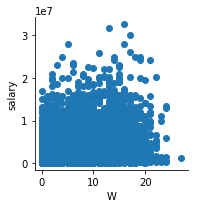

In [41]:
g = sns.FacetGrid(df,size=3)
g = g.map(plt.scatter, "W", "salary")

# American
g = sns.FacetGrid(df[df["lgID"].str.contains("AL")],col="yearID",hue="teamID",col_wrap=5,size=2.2)
g = g.map(plt.scatter, "W", "salary")
g.add_legend()

# National
g = sns.FacetGrid(df[df["lgID"].str.contains("NL")],col="yearID",hue="teamID",col_wrap=5,size=2.2)
g = g.map(plt.scatter, "W", "salary")
g.add_legend()